### Analysis software development v2 

Goal: establish smooth reading of the binary DAQ datafiles

In [2]:
import sys
sys.path.insert(0,'python/')
import struct
import matplotlib.pyplot as plt
from scipy.stats import norm


# import data handling class
from DT5550 import *


Open a datafile and read the data

In [75]:
#
# open the datfile / data directory
#
    
#
# loop over all the events
#
dt_max = 10

Etot = []
tt = []
pp = []
for i in range(8):
    tt.append([])
    pp.append([])
tdif = []

nmax = 9999

#    while io.read_event() == 0:
#        #
#        # data: io.Q[0:ndet-1] -> energy
#        #       io.ph[0:ndet-1] -> peak height
#        #       io.t[0:ndet-1] -> time without timewalk correction
#        #       io.tc[0:ndet-1] -> time with timewalk correction
#        #       io.valid[0:ndet-1] -> valid bit = 1 for valid data
#        #       io.R[0:ndet-1] -> peak/area ratio


# tagged
#io = DT5550(indir='C:/data/20220118_100036')

io = DT5550(indir='C:/data/20220119_135419/')

nf = 0

dtime = []
for file in io.filenames:
    io.open_data(file)
    nf = nf + 1
    if nf>nmax:
        break
    while io.read_event() == 0: 
        # data: io.Q[0:ndet-1] -> energy
        #       io.ph[0:ndet-1] -> peak height
        #       io.t[0:ndet-1] -> time without timewalk correction
        #       io.tc[0:ndet-1] -> time with timewalk correction
        #       io.valid[0:ndet-1] -> valid bit = 1 for valid data
        #       io.R[0:ndet-1] -> peak/area ratio
        nh = io.valid.sum()
        
        Etot.append(io.Qraw.sum())
#         for idet in range(N_DETECTOR):
#             if io.valid[idet] == 1:
#                 tt[idet].append(io.tc[idet])
                
        for idet in range(8):
            if io.valid[idet] == 1 and io.tc[idet]<100:
                tt[idet].append(io.tc[idet])
                pp[idet].append(io.ph[idet])

        
        tdif = []
        if nh == 2:
            
            for idet in range(N_DETECTOR):
                if io.valid[idet] == 1:
                    tdif.append(idet)
                    
            peak1 = tdif[0]
            peak2 = tdif[1]  
            dtime.append(io.tc[peak2] - io.tc[peak1])
            
#         print(io.ph[6])    
#         print(io.timewalk_correct(6))
print('Processing done')

Etot = np.array(Etot,dtype=object)
tt = np.array(tt,dtype=object)
pp = np.array(pp,dtype=object)


#r = np.array(r, dtype=object)

DT5550:: Data recorded with config:  C:/data/20220119_135419\config_20220119_135419.json
DT5550:: Open data file: C:/data/20220119_135419\data_20220119_135419_0.raw
Processing done


#### Define fit functions

7737


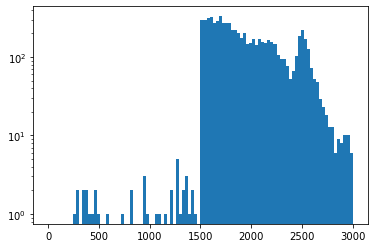

In [68]:
h = plt.hist(Etot,bins=100,range=(0,3000))
plt.yscale('log')


print(len(Etot))

0 n =  2006
1 n =  1996
2 n =  1259
3 n =  1448
4 n =  1837
5 n =  1713
6 n =  1677
7 n =  1401


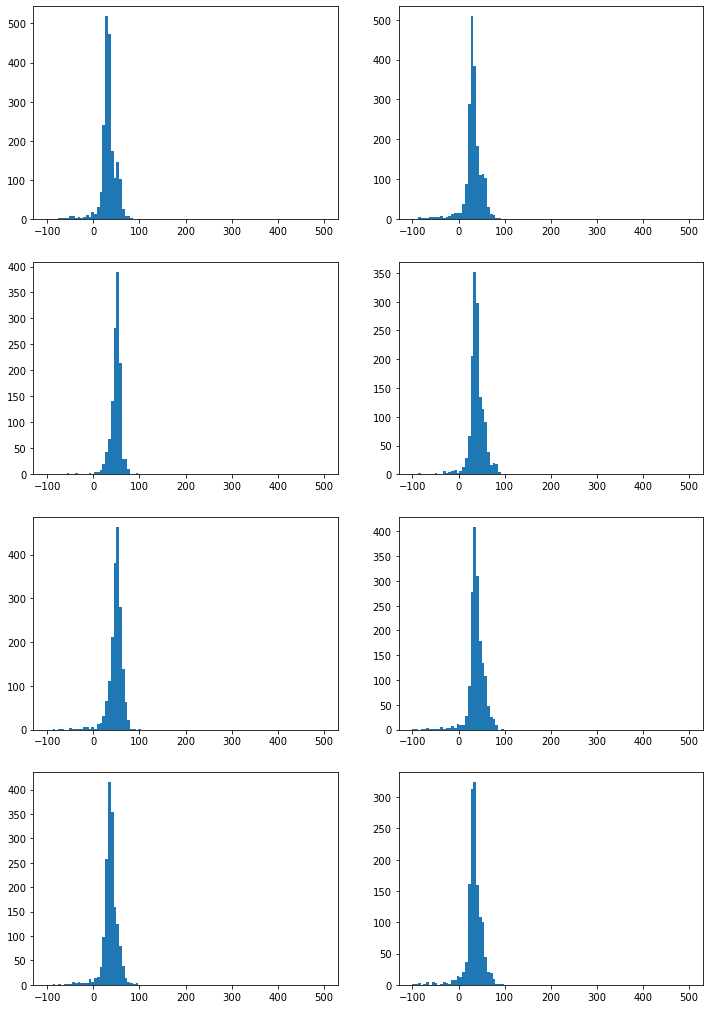

In [69]:
plt.figure(figsize=(12,18))
for idet in range(N_DETECTOR):
    plt.subplot(4, 2, 1 + idet)
    h = plt.hist(tt[idet],bins=100,range=(-100,500))
    print(idet, 'n = ', len(tt[idet]))
#     if idet == 7:
#        print(idet,tt[idet])

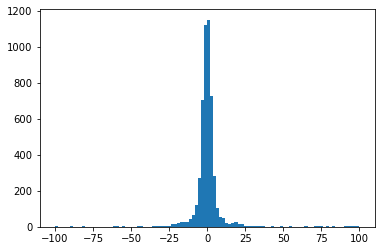

In [70]:
h = plt.hist(dtime,bins=100,range=(-100,100))

In [71]:
75/1800*2**14


682.6666666666666

0 n =  14907
1 n =  14171
2 n =  9035
3 n =  10927
4 n =  13042
5 n =  12527
6 n =  12298
7 n =  10031


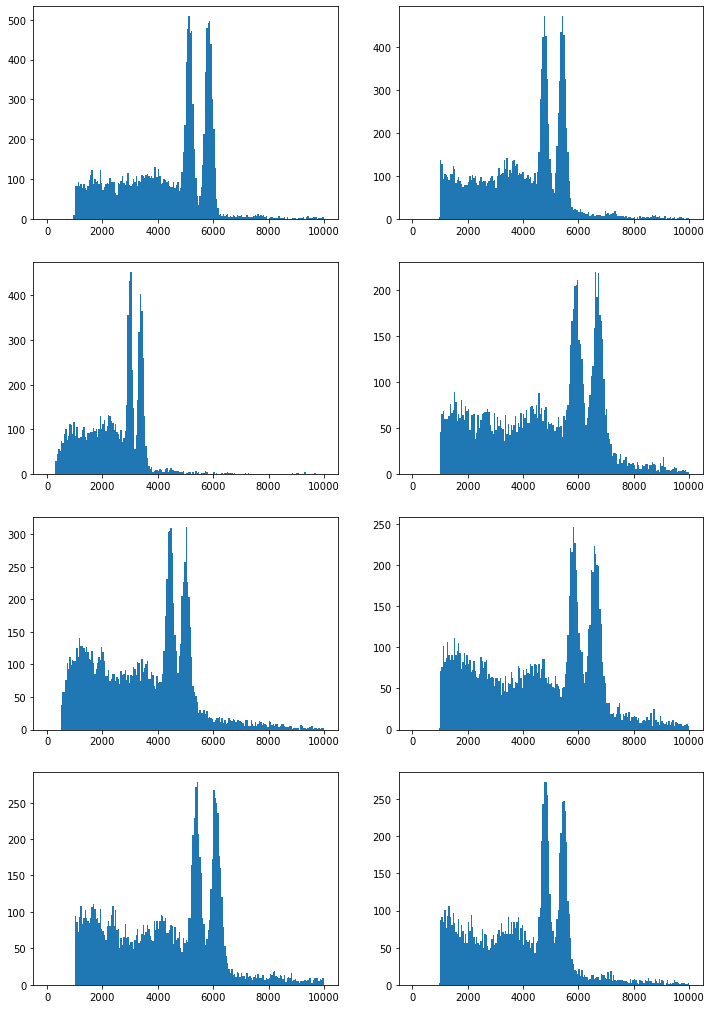

In [76]:
plt.figure(figsize=(12,18))
for idet in range(N_DETECTOR):
    plt.subplot(4, 2, 1 + idet)
    h = plt.hist(pp[idet],bins=200,range=(0,10000))
    print(idet, 'n = ', len(tt[idet]))
#     if idet == 7:
#        print(idet,tt[idet])